In [1]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    import pandas as pd
    import pandas_datareader.data as web
    import pickle 
    import requests
    import tensorflow as tf
    import os
    from datetime import date

In [2]:
name = 'Deep Evolution Strategy'
image_path = 'D:/kenneth/agent/images/'
path = 'D:/kenneth/trading/'
run_date=open(path+'run_date.txt').read()
start=('2019-01-01')
end=('2019-12-31')
days=30

In [3]:
if not os.path.exists(image_path+name):
        os.makedirs(image_path+name) 
with open('D:/kenneth/trading/sp500/sp500tickers.txt','r') as f:
    tickers=[line.rstrip('\n') for line in f]

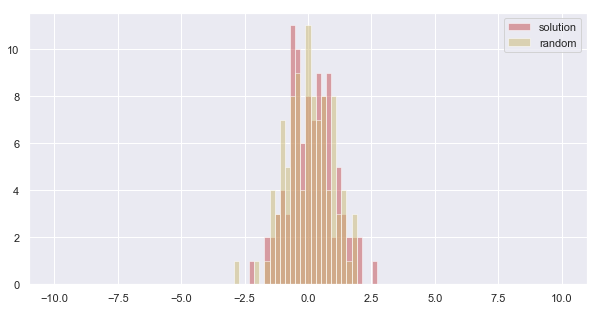

In [4]:
plt.figure(figsize = (10, 5))
bins = np.linspace(-10, 10, 100)

solution = np.random.randn(100)
w = np.random.randn(100)

plt.hist(solution, bins, alpha = 0.5, label = 'solution', color = 'r')
plt.hist(w, bins, alpha = 0.5, label = 'random', color = 'y')
plt.legend()
plt.show()

In [5]:
def f(w):
    return -np.sum(np.square(solution - w))


npop = 50
sigma = 0.1
alpha = 0.001

for i in range(5000):

    if (i + 1) % 1000 == 0:
        print(
            'iter %d. w: %s, solution: %s, reward: %f'
            % (i + 1, str(w[-1]), str(solution[-1]), f(w))
        )
    N = np.random.randn(npop, 100)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma * N[j]
        R[j] = f(w_try)

    A = (R - np.mean(R)) / np.std(R)
    w = w + alpha / (npop * sigma) * np.dot(N.T, A)

iter 1000. w: -1.2311343445182767, solution: -1.5159340438466775, reward: -5.388919
iter 2000. w: -1.5193640102669843, solution: -1.5159340438466775, reward: -0.006963
iter 3000. w: -1.506842881824557, solution: -1.5159340438466775, reward: -0.006281
iter 4000. w: -1.535183656051322, solution: -1.5159340438466775, reward: -0.009729
iter 5000. w: -1.5063945979268676, solution: -1.5159340438466775, reward: -0.008594


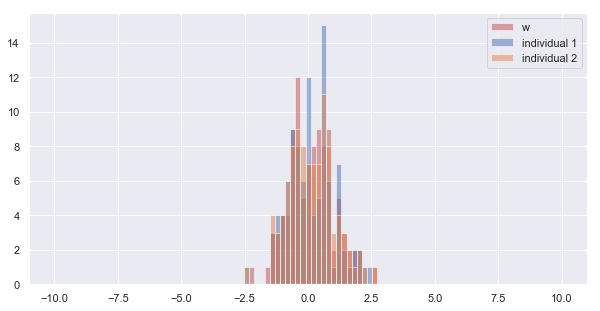

In [6]:
'''
I want to compare my first two individuals with my real w
'''
plt.figure(figsize=(10,5))

sigma = 0.1
N = np.random.randn(npop, 100)
individuals = []
for j in range(2):
    individuals.append(w + sigma * N[j])
    
    
plt.hist(w, bins, alpha=0.5, label='w',color='r')
plt.hist(individuals[0], bins, alpha=0.5, label='individual 1')
plt.hist(individuals[1], bins, alpha=0.5, label='individual 2')
plt.legend()
plt.show()

In [7]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[: t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [8]:
# close = df.Close.values.tolist()
# get_state(close, 0, 10)

NameError: name 'df' is not defined

In [ ]:
# get_state(close, 1, 10)

In [ ]:
# get_state(close, 2, 10)

In [9]:
class Deep_Evolution_Strategy:
    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                pass
#                 print(
#                     'iter %d. reward: %f'
#                     % (i + 1, self.reward_function(self.weights))
#                 )
#         print('time taken to train:', time.time() - lasttime, 'seconds')

In [10]:
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [11]:
# window_size = 30
# model = Model(window_size, 500, 3)

In [15]:
# initial_money = 10000
# starting_money = initial_money
# len_close = len(close) - 1
# weight = model
# skip = 1

# state = get_state(close, 0, window_size + 1)
# inventory = []
# quantity = 0

# max_buy = 1
# max_sell = 1


# def act(model, sequence):
#     decision, buy = model.predict(np.array(sequence))
#     return np.argmax(decision[0]), int(buy[0])


# for t in range(0, len_close, skip):
#     action, buy = act(weight, state)
#     next_state = get_state(close, t + 1, window_size + 1)
#     if action == 1 and initial_money >= close[t]:
#         if buy < 0:
#             buy = 1
#         if buy > max_buy:
#             buy_units = max_buy
#         else:
#             buy_units = buy
#         total_buy = buy_units * close[t]
#         initial_money -= total_buy
#         inventory.append(total_buy)
#         quantity += buy_units
#     elif action == 2 and len(inventory) > 0:
#         if quantity > max_sell:
#             sell_units = max_sell
#         else:
#             sell_units = quantity
#         quantity -= sell_units
#         total_sell = sell_units * close[t]
#         initial_money += total_sell

#     state = next_state
# ((initial_money - starting_money) / starting_money) * 100

In [16]:
import time


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(
        self, model, money, max_buy, max_sell, close, window_size, skip
    ):
        self.window_size = window_size
        self.skip = skip
        self.close = close
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision, buy = self.model.predict(np.array(sequence))
        return np.argmax(decision[0]), int(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        len_close = len(self.close) - 1

        self.model.weights = weights
        state = get_state(self.close, 0, self.window_size + 1)
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
            elif action == 2 and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        len_close = len(self.close) - 1
        state = get_state(self.close, 0, self.window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
#                 print(
#                     'day %d: buy %d units at price %f, total balance %f'
#                     % (t, buy_units, total_buy, initial_money)
#                 )
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
#                 print(
#                     'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
#                     % (t, sell_units, total_sell, invest, initial_money)
#                 )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
#         print(
#             '\ntotal gained %f, total investment %f %%'
#             % (initial_money - starting_money, invest)
#         )
        return states_buy, states_sell

        

In [17]:
def plot_all(ticker):
    close = df['Close']
    fig = plt.figure(figsize = (15,5), facecolor='yellowgreen', dpi=100)
    plt.plot(close, color='k', lw=3., alpha=0.5)
    plt.plot(close, '^', markersize=10, color='g', label = 'buying signal', markevery = states_buy)
    plt.plot(close, 'v', markersize=10, color='r', label = 'selling signal', markevery = states_sell)
    plt.title(name+'\n'+'Ticker: '+ticker)
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().axes.get_yaxis().set_visible(False)
    fig.tight_layout()
    plt.savefig(image_path+name+'/'+ticker+'.png', facecolor='yellowgreen', dpi=100)
    #plt.show()
    plt.close()

In [18]:
def display_only(days):
    new_buy = []
    new_sell = []
    display_days = days
    total_days= df.shape[0]
    display_from = total_days-display_days
    for i in(states_buy):
        if i > display_from:
            adj = i- display_from
            new_buy.append(adj)
    for i in(states_sell):
        if i > display_from:
            adj = i- display_from
            new_sell.append(adj)
    
    return(new_buy, new_sell)

In [19]:
def plot_by_days(days, ticker):
    close = df['Close'][-days:]
    fig = plt.figure(figsize = (15,5), facecolor='yellowgreen', dpi=100)
    plt.plot(close, color='k', lw=3., alpha=0.5)
    plt.plot(close, '^', markersize=12, color='g',alpha=1.0,label = 'buying signal', markevery = new_buy)
    plt.plot(close, 'v', markersize=12, color='r',alpha=1.0, label = 'selling signal', markevery = new_sell)
    plt.title(name+'\n'+'Last '+str(days)+' Daily Trade Recommendations')
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().axes.get_yaxis().set_visible(False)
    fig.tight_layout()
    plt.savefig(image_path+name+'/'+ticker+'_'+str(days)+'.png', facecolor='yellowgreen', dpi=100)
    #plt.show()
    plt.close()

In [24]:
def save_signals():
    path2 = image_path+name+'/signal/'
    if not os.path.exists(path2):
        os.makedirs(path2)
        
    if  (len(states_buy)!= 0) and (len(states_sell) != 0):  
        if int(states_buy[-1])>int(states_sell[-1]):
            last_signal = 'Trading Buy'
            signal_day = str(df.index[states_buy[-1]]).split(' ')[0]
        else:
            last_signal = 'Trading Sell'
            signal_day = str(df.index[states_sell[-1]]).split(' ')[0]
        
    elif len(states_buy)== 0 and len(states_sell)>0:
        last_signal = 'Trading Sell'
        signal_day = str(df.index[states_sell[-1]]).split(' ')[0]
    elif len(states_sell)== 0 and len(states_buy)>0:
        last_signal = 'Trading Buy'
        signal_day = str(df.index[states_buy[-1]]).split(' ')[0]
    elif len(states_sell)== 0 and len(states_buy)==0:
        last_signal = 'None'
        signal_day = 'None'  
        
    with open(path2+ticker+'.txt','w') as f:
        print(
            'model_run,','signal_day,','last_signal,','total_gains,','invest,','data_start','\n',
              str(date.today()),',',signal_day,',',last_signal,',','Not Available',',','Not Available',',',str(start),
              file=f)

In [25]:
window_size = 30
# model = Model(window_size, 500, 3)
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
initial_money = 10000
starting_money = initial_money
iterations = 10
checkpoint = 10
# len_close = len(close) - 1
weight = model
skip = 1

#state = get_state(close, 0, window_size + 1)
inventory = []
quantity = 0

max_buy = 1
max_sell = 1

for ticker in tickers:
    df = pd.read_csv(path+'sp500/'+run_date+'/'+ticker+'.csv', index_col=0, parse_dates=True)
    df =df[start:end]
   
    print('Started ticker:', ticker)

    close = df.Close.values.tolist()
    get_state(close, 0, 10)
    get_state(close, 1, 10)
    get_state(close, 2, 10)
    len_close = len(close) - 1
    state = get_state(close, 0, window_size + 1)
    agent = Agent(
                    model = model,
                    money = 10000,
                    max_buy = 5,
                    max_sell = 5,
                    close = close,
                    window_size = window_size,
                    skip = 1,
                )
    agent.fit(iterations = iterations, checkpoint = checkpoint)
    
    states_buy, states_sell = agent.buy()
    save_signals()
    plot_all(ticker)
#     new_buy, new_sell = display_only(days)
#     plot_by_days(days, ticker)


Started ticker: A
Started ticker: AAL
Started ticker: AAP
Started ticker: AAPL
Started ticker: ABBV
Started ticker: ABC
Started ticker: ABMD
Started ticker: ABT
Started ticker: ACN
Started ticker: ADBE
Started ticker: ADI
Started ticker: ADM
Started ticker: ADP
Started ticker: ADS
Started ticker: ADSK
Started ticker: AEE
Started ticker: AEP
Started ticker: AES
Started ticker: AFL
Started ticker: AGN
Started ticker: AIG
Started ticker: AIV
Started ticker: AIZ
Started ticker: AJG
Started ticker: AKAM
Started ticker: ALB
Started ticker: ALGN
Started ticker: ALK
Started ticker: ALL
Started ticker: ALLE
Started ticker: ALXN
Started ticker: AMAT
Started ticker: AMCR
Started ticker: AMD
Started ticker: AME
Started ticker: AMG
Started ticker: AMGN
Started ticker: AMP
Started ticker: AMT
Started ticker: AMZN
Started ticker: ANET
Started ticker: ANSS
Started ticker: ANTM
Started ticker: AON
Started ticker: AOS
Started ticker: APA
Started ticker: APD
Started ticker: APH
Started ticker: APTV
Start

KeyboardInterrupt: 